In [1]:
import yfinance as yahoofinance
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np
import pandas as pd

In [2]:
#Download the market(S&P500) and the other stocks
stock = input()
data = yahoofinance.download(stock)
ticker = yahoofinance.Tickers(stock)
data = ticker.history(period='1y')

QTWO,SSTI,OPRX,RDVT,CNNE,EVBG,RMNI,FLGT,APPS,CZR
[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  10 of 10 completed


In [3]:
stock_list = stock.split(",")
len(stock_list)

10

In [4]:
portfolio = []
def invested(array):
    for i in range(len(array)):
        stock = array[i]
        data = yahoofinance.download(stock)
        ticker = yahoofinance.Ticker(stock)
        data = ticker.history(period='1y')
        price = data.Close[-1]
        print("Stock Price $",round(price,2))
        print("Amount of Shares", stock, ":")
        total = price * float(input())
        portfolio.append(round(total,2))

In [5]:
invested(stock_list)

[*********************100%%**********************]  1 of 1 completed
Stock Price $ 43.91
Amount of Shares QTWO :
0.212
[*********************100%%**********************]  1 of 1 completed
Stock Price $ 25.16
Amount of Shares SSTI :
0.352
[*********************100%%**********************]  1 of 1 completed
Stock Price $ 14.33
Amount of Shares OPRX :
0.553
[*********************100%%**********************]  1 of 1 completed
Stock Price $ 20.21
Amount of Shares RDVT :
0.378
[*********************100%%**********************]  1 of 1 completed
Stock Price $ 19.93
Amount of Shares CNNE :
0.347
[*********************100%%**********************]  1 of 1 completed
Stock Price $ 24.63
Amount of Shares EVBG :
0.258
[*********************100%%**********************]  1 of 1 completed
Stock Price $ 3.28
Amount of Shares RMNI :
1.819
[*********************100%%**********************]  1 of 1 completed
Stock Price $ 29.92
Amount of Shares FLGT :
0.188
[*********************100%%**********************

In [6]:
portfolio_amount = pd.DataFrame(portfolio).sum()
portfolio_amount = portfolio_amount
portfolio_amount.tolist()
print(portfolio_amount)

0    64.56
dtype: float64


In [7]:
weighted = []
def weight(amount, array):
    for i in range(len(array)):
        stock = array[i]
        data = yahoofinance.download(stock)
        ticker = yahoofinance.Ticker(stock)
        data = ticker.history(period='1y')
        price = data.Close[-1]
        print("Stock Price $",round(price,2))
        print("Amount of Shares", stock, ":")
        weights = (price*float(input()))/amount
        weighted.append(weights)

In [8]:
weight(portfolio_amount,stock_list)

[*********************100%%**********************]  1 of 1 completed
Stock Price $ 43.91
Amount of Shares QTWO :
0.212
[*********************100%%**********************]  1 of 1 completed
Stock Price $ 25.16
Amount of Shares SSTI :
0.352
[*********************100%%**********************]  1 of 1 completed
Stock Price $ 14.33
Amount of Shares OPRX :
0.553
[*********************100%%**********************]  1 of 1 completed
Stock Price $ 20.21
Amount of Shares RDVT :
0.378
[*********************100%%**********************]  1 of 1 completed
Stock Price $ 19.94
Amount of Shares CNNE :
0.347
[*********************100%%**********************]  1 of 1 completed
Stock Price $ 24.63
Amount of Shares EVBG :
0.258
[*********************100%%**********************]  1 of 1 completed
Stock Price $ 3.27
Amount of Shares RMNI :
1.819
[*********************100%%**********************]  1 of 1 completed
Stock Price $ 29.94
Amount of Shares FLGT :
0.188
[*********************100%%**********************

In [9]:
weighted = pd.DataFrame(weighted)[0]

In [10]:
weighted = weighted.values.tolist()

In [11]:
#weighted.clear()

In [12]:
returns = (data.Close - data.Close.shift(1))/data.Close.shift(1)
stdev = returns.std() * (252**0.5)

In [13]:
stdev

APPS    0.763697
CNNE    0.293193
CZR     0.456163
EVBG    0.495238
FLGT    0.446641
OPRX    0.613923
QTWO    0.521256
RDVT    0.438858
RMNI    0.689741
SSTI    0.608726
dtype: float64

In [14]:
covariance = returns.cov()
covariance

,APPS,CNNE,CZR,EVBG,FLGT,OPRX,QTWO,RDVT,RMNI,SSTI
APPS,0.002314,0.000371,0.000611,0.000668,0.000428,0.000457,0.000722,0.000370,0.000444,0.000389
CNNE,0.000371,0.000341,0.000296,0.000255,0.000198,0.000204,0.000294,0.000121,0.000173,0.000164
CZR,0.000611,0.000296,0.000826,0.000411,0.000313,0.000356,0.000471,0.000195,0.000317,0.000338
EVBG,0.000668,0.000255,0.000411,0.000973,0.000309,0.000267,0.000417,0.000119,0.000260,0.000295
FLGT,0.000428,0.000198,0.000313,0.000309,0.000792,0.000182,0.000252,0.000171,0.000194,0.000149
OPRX,0.000457,0.000204,0.000356,0.000267,0.000182,0.001496,0.000436,0.000103,0.000253,0.000231
QTWO,0.000722,0.000294,0.000471,0.000417,0.000252,0.000436,0.001078,0.000202,0.000351,0.000154
RDVT,0.000370,0.000121,0.000195,0.000119,0.000171,0.000103,0.000202,0.000764,0.000078,0.000098
RMNI,0.000444,0.000173,0.000317,0.000260,0.000194,0.000253,0.000351,0.000078,0.001888,0.000226
SSTI,0.000389,0.000164,0.000338,0.000295,0.000149,0.000231,0.000154,0.000098,0.000226,0.001470


In [15]:
weighted

[0.1441902101556903,
 0.13715242010066941,
 0.12273756600962549,
 0.11832992029012801,
 0.10717441427072479,
 0.09842843530789626,
 0.09213336377486567,
 0.08718587516113432,
 0.07917104144817244,
 0.013296468018599157]

In [16]:
portfolio_variance = covariance.mul(weighted,axis=0).mul(weighted,axis=1).sum().sum()
portfolio_variance

0.0004236849651872674

In [17]:
portfolio_stdev = np.sqrt(portfolio_variance)
portfolio_stdev

0.020583609139003475

In [18]:
annual_portfolio_variance = portfolio_stdev * np.sqrt(252)
annual_portfolio_variance

0.3267546651957572

In [19]:
return_total = pd.DataFrame(returns.sum()).sum()
return_total

0    1.04612
dtype: float64

In [20]:
portfolio_returns = np.dot(weighted,return_total.sum())
portfolio_returns = portfolio_returns.sum()
portfolio_returns

1.0459102547668018

In [21]:
stock_list.insert(-1,"^GSPC")

In [22]:
close = []
cov = []
var = []
capm = []
risk_free = []
def capm_model(array):
    stock = stock_list
    data = yahoofinance.download(stock)
    ticker = yahoofinance.Tickers(stock)
    data = ticker.history(period='1y')
    log_returns = np.log(data.Close/data.Close.shift())
    log_returns.dropna(inplace=True)
    covariance = log_returns.cov()
    variance = log_returns['^GSPC'].var()
    beta = covariance.loc['^GSPC'] / variance
    risk_free_rate = (5.5-3.1)/100
    market_risk_premium = 0.10 - risk_free_rate
    for i in range(len(stock[0:len(stock)])):
        capital_asset_price_model = risk_free_rate + (beta[stock[i]]*market_risk_premium)
        capm.append(capital_asset_price_model)
    close.append(data.Close)
    cov.append(covariance)
    var.append(variance)
    risk_free.append(risk_free_rate)

In [23]:
capm_model(stock_list)

[*********************100%%**********************]  11 of 11 completed
[*********************100%%**********************]  11 of 11 completed


In [24]:
stock_list

['QTWO',
 'SSTI',
 'OPRX',
 'RDVT',
 'CNNE',
 'EVBG',
 'RMNI',
 'FLGT',
 'APPS',
 '^GSPC',
 'CZR']

In [25]:
market = stock_list.index("^GSPC")
market = capm[market]
market

0.10000000000000003

In [26]:
stock_list.remove("^GSPC")

In [27]:
capm.remove(market)

In [28]:
capm

[0.19799707083894624,
 0.10579228271438126,
 0.1555949131508045,
 0.09045336317936228,
 0.1338314893560715,
 0.17084298994147776,
 0.13426186760767497,
 0.12148709822839981,
 0.21624404366796393,
 0.1977800253570111]

In [29]:
close

[               APPS       CNNE        CZR       EVBG       FLGT       OPRX  \
 Date                                                                         
 2022-12-28  14.0100  19.580000  39.990002  26.950001  29.230000  15.900000   
 2022-12-29  15.3100  20.510000  41.439999  28.530001  30.030001  16.559999   
 2022-12-30  15.2400  20.650000  41.599998  29.580000  29.780001  16.799999   
 2023-01-03  15.0300  20.580000  42.259998  28.660000  30.660000  17.120001   
 2023-01-04  15.8500  21.400000  45.389999  28.480000  31.080000  18.840000   
 ...             ...        ...        ...        ...        ...        ...   
 2023-12-21   6.8900  19.790001  47.669998  24.059999  29.809999  14.250000   
 2023-12-22   6.8300  19.719999  46.820000  24.370001  30.230000  14.000000   
 2023-12-26   6.9700  19.850000  47.549999  24.700001  30.270000  14.080000   
 2023-12-27   6.9900  19.860001  47.160000  24.559999  30.150000  14.100000   
 2023-12-28   6.9731  19.930000  47.689999  24.62999

In [30]:
portfolio_value = portfolio
portfolio_value = pd.DataFrame(portfolio_value).sum()
days = 20
trading_days = 252
capm = pd.DataFrame(capm)
expect = []
for i in range(len(stock_list)):
    expected = portfolio_amount * (capm[0][i]*weighted[i])
    expect.append(expected)
expect = pd.DataFrame(expect).sum()
expect = expect * (days/trading_days)
expect

0    0.75182
dtype: float64

In [31]:
stock_list

['QTWO', 'SSTI', 'OPRX', 'RDVT', 'CNNE', 'EVBG', 'RMNI', 'FLGT', 'APPS', 'CZR']

In [32]:
capm

,0
0,0.197997
1,0.105792
2,0.155595
3,0.090453
4,0.133831
5,0.170843
6,0.134262
7,0.121487
8,0.216244
9,0.197780


In [33]:
np.round(expect,2)

0    0.75
dtype: float64

In [34]:
(round(expect,2)+portfolio_value)/portfolio_value

0    1.011617
dtype: float64

In [35]:
mean = returns.mean()
mean

APPS   -0.001461
CNNE    0.000243
CZR     0.001110
EVBG    0.000143
FLGT    0.000480
OPRX    0.000358
QTWO    0.002874
RDVT   -0.000089
RMNI    0.000504
SSTI    0.000005
dtype: float64

In [36]:
portfolio_mean = []
for i in range(len(stock_list)):
    total = mean[i].cumprod()
    portfolio_mean.append(total)
portfolio_mean = (pd.DataFrame(portfolio_mean).sum())/len(stock_list)
portfolio_mean

0    0.000417
dtype: float64

In [37]:
fitfh_percentile = -1.645
one_percentile = -2.326

In [38]:
data.Close[stock_list[0]][-1]

43.90999984741211

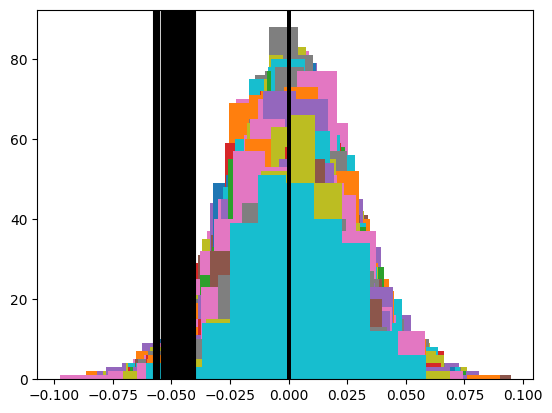

In [39]:
portfolio_return = []
portfolio_risk = []
portfolio_expected_return = []
portfolio_weight = []
for x in range(1000):
    weight = np.random.random_sample(len(stock_list))
    weight = (weight/np.sum(weight))
    investment_amount = portfolio_amount

    simulation_repetions = np.random.normal(portfolio_mean,portfolio_stdev,252)
    simulated_returns = simulation_repetions
    simulated_mean = simulated_returns.mean()
    simulated_stdev = simulated_returns.std()
    simulated_portfolio_mean = simulated_mean
    simulation_repetion = np.random.normal(simulated_portfolio_mean,simulated_stdev,252)
    simulated_return = simulation_repetion
    
    simulated_weigths = []
    for i in range(len(stock_list)):
        sim_weights = weight[i]
        simulated_weigths.append(sim_weights)
    simulated_portfolio_stdev = simulated_stdev
    simulated_portfolio_stdev
    
    simulated_annual_portfolio_variance = simulated_portfolio_stdev * np.sqrt(252)
    simulated_annual_portfolio_variance
    simulated_portfolio_returns = np.dot(simulated_weigths,simulated_returns.sum())
    simulated_portfolio_returns
    simulated_expected_return = []
    for i in range(len(stock_list)):
        sim_returns = portfolio_amount*((data.Close[stock_list[i]][-1]*simulated_weigths[i]))
        simulated_expected_return.append(sim_returns)
    simulated_expected_return = pd.DataFrame(simulated_expected_return)
    simulated_expected_return = simulated_expected_return.sum()
    simulated_expected_return = simulated_expected_return * (days/trading_days)
    worst_case_loss = (one_percentile * simulated_stdev) + simulated_mean
    plt.hist(simulated_return, bins=10)
    plt.axvline(0, color='black')
    plt.axvline((one_percentile * simulated_stdev) + simulated_mean, color='black')
    portfolio_risk.append(worst_case_loss)
    portfolio_return.append(simulated_portfolio_returns)
    portfolio_weight.append(simulated_weigths)
    portfolio_expected_return.append(simulated_expected_return)

In [40]:
portfolio_risk = pd.DataFrame(portfolio_risk)
average_mean = portfolio_risk.mean()
max_5th_percentile_loss = portfolio_amount * average_mean
round(max_5th_percentile_loss,2)

0   -3.06
dtype: float64

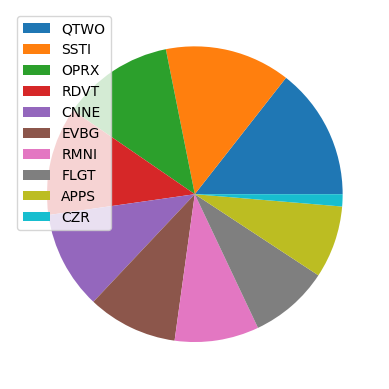

In [41]:
plt.plot(figsize=(1,50))
plt.pie(weighted)
plt.legend(stock_list)

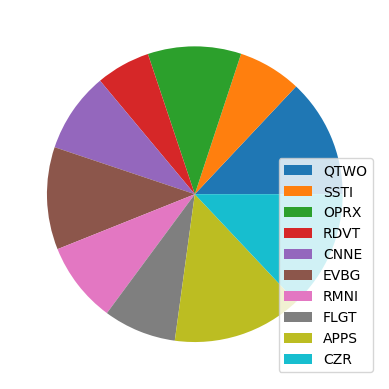

In [42]:
plt.pie(capm[0])
plt.legend(stock_list)

In [43]:
#file = pd.DataFrame(portfolio_risk)
#file.to_csv(f'Data.csv')